## NoteBook for the first project
- Je pensais que l'on pouvait essayer de faire ca comme ceci:
    - Chacun de nous a un block (peut bien entendu en ajouter en dessous du sien) afin de ne pas avoir trop de conflit lorsque l'on git push
        - A tester cette semaine pour voir si c'est ok

# Stefan's Blocks

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2



In [ ]:
# Import csv file

# Import of train.csv
id_train, labels_train, features_train = load_data("train.csv")

# Import of test.csv
id_test, features_test = load_data("test.csv")

In [3]:
# Cell to check if everything is all right for the import
print("To test the load of train.csv:\n")
print(id_train.shape)
print(labels_train)
print(features_train.shape)

print("\nTo test the load of test.csv:\n")
print(id_test.shape)
print(features_test.shape)

To test the load of train.csv:

(250000,)
[1 0 0 ..., 1 0 0]
(250000, 30)

To test the load of test.csv:

(568238,)
(568238, 30)


In [7]:
colors = []
for t in range(labels_train.shape[0]):
    if labels_train[t] == 1:
        colors.append('b')
    else:
        colors.append('r')
print(colors)

In [8]:
j = 0
signal = []
background = []

for i in labels_train:
    if i == 1:
        signal.append(features_train[j,:])
    else:
        background.append(features_train[j,:])
    j = j+1

C:\Users\froel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

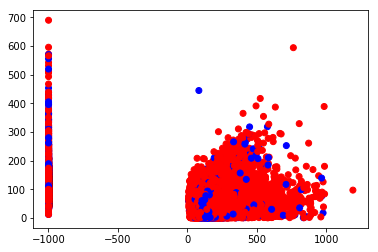

In [ ]:
# Plot one features VS another one
for i in range(features_train.shape[1]):
    if i < features_train.shape[1]-1:
        plt.figure()
        plt.scatter(features_train[:,i], features_train[:,i+1],color = colors)
plt.show()

In [4]:
# To compute the losse, with mse --> with solution
def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    """compute the loss by mse."""
    e = y - tx.dot(w)
    mse = e.dot(e) / (2 * len(e))
    return mse

In [5]:
# Gradient descent

def compute_gradient(y, tx, w):
    """Compute the gradient."""

    # compute gradient and loss
    e = y - np.dot(tx, w)
    gradient = -1/len(y) * np.dot(tx.T, e)
    
    loss = compute_mse(y,tx,w)
    return gradient, loss


def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        gradient, loss = compute_gradient(y,tx,w)

        # update w by gradient
        w = ws[n_iter] - gamma*gradient
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses[-1], ws[-1,:]

In [6]:
# Stochastic gradient descent
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]
            

def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - np.dot(tx, w)
    gradient = -1/len(y) * np.dot(tx.T, e)
    
    loss = compute_loss(y,tx,w)
    return gradient, loss


def stochastic_gradient_descent(y, tx, initial_w, max_iters, gamma, batch_size=1):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    lossForOneRun = 0
    
    for n_iters in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient, loss = compute_stoch_gradient(minibatch_y, minibatch_tx, ws[n_iters])
            lossForOneRun = lossForOneRun + loss
            w = ws[n_iters] - gamma*gradient
        
        losses.append((1/batch_size)*lossForOneRun)
        ws.append(w)
    
    return losses[-1], ws[-1,:]

In [7]:
# Least squares --> With solution
def least_squares(y, tx):
    """calculate the least squares solution."""
    
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)
    loss = compute_mse(y, tx, w)
    
    return w, loss


In [8]:
# Ridge_regression using normal equations --> with solution
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""

    aI = 2 * tx.shape[0] * lambda_*np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    
    w = np.linalg.solve(a,b)
    loss = compute_mse(y, tx, w)
    
    return w, loss

# Etienne's Blocks

In [ ]:
# First block for Ivan
print('HELLLLLOOOO')

# Ivan's Blocks

In [1]:
# First block for Ivan
print('Salut kikoo')

Salut kikoo


In [2]:
import numpy as np

In [1]:
print('Test deuxième branch')

encore une modification
